In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [19]:
df = pd.read_csv(r"C:\Projects\food-delivery-regression\data\processed\food_delivery_processed.csv")
df.head()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bike,Vehicle_Type_Car,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Order_Time_Evening,Order_Time_Morning,Order_Time_Night,Order_Priority_Low,Order_Priority_Medium,Delivery_Time
0,1.57,4,4.1,3.0,1321.10,81.54,False,True,False,True,True,False,False,False,False,False,False,True,26.22
1,21.32,8,4.5,4.2,152.21,29.02,False,True,False,True,False,False,False,False,False,True,True,False,62.61
2,6.95,9,3.3,3.4,1644.38,64.17,False,True,True,False,False,True,False,False,False,True,False,False,48.43
3,13.79,2,3.2,3.7,541.25,79.23,True,False,True,False,False,False,False,True,False,False,False,True,111.63
4,6.72,6,3.5,2.8,619.81,2.34,False,False,True,False,True,False,False,False,False,True,True,False,32.38


In [20]:
X = df.drop(columns=['Delivery_Time'])
Y = df['Delivery_Time']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [22]:
x_train.shape, y_train.shape

((180, 18), (180,))

In [23]:
num_cols = [
    'Distance',
    'Delivery_Person_Experience',
    'Restaurant_Rating',
    'Customer_Rating',
    'Order_Cost',
    'Tip_Amount'
]

In [24]:
scaler = StandardScaler()

In [25]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [26]:
x_train[num_cols].describe().round(2)

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.60,-1.59,-1.78,-1.56,-1.65,-1.52
25%,-0.78,-0.86,-0.77,-0.85,-0.89,-0.94
50%,-0.18,0.05,0.10,0.01,-0.01,0.02
75%,0.72,0.96,0.82,0.87,0.89,0.83
max,1.98,1.69,1.83,1.87,1.75,1.86


In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = model.predict(x_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
mse

1212.8163876507565

In [31]:
mae

29.890209191063764

In [32]:
r2

-0.29315269341854355

In [33]:
#   A baseline linear regression model was trained to establish a reference point. The model underperformed (R² < 0), indicating that linear 
#   assumptions are insufficient for capturing the underlying delivery time dynamics. This motivates the need for interaction terms or non-linear 
#   models.

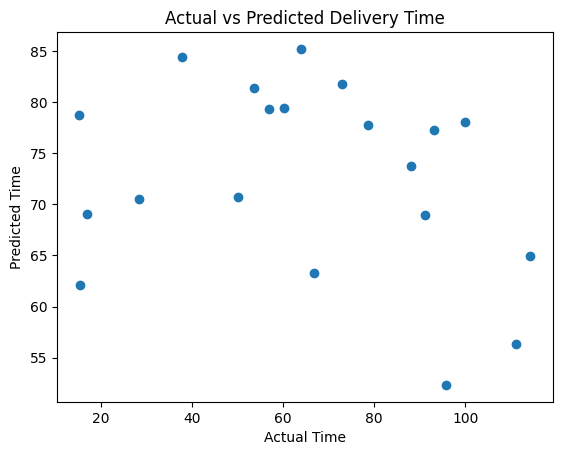

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.title('Actual vs Predicted Delivery Time')
plt.show()